# WATER QUALITY PREDICTION

#### Water quality prediction is a crucial aspect of environmental monitoring and management that involves forecasting the condition of water bodies, such as rivers, lakes, reservoirs, and oceans. Water quality prediction plays a vital role in safeguarding human health, protecting aquatic ecosystems, and supporting sustainable water resource management. By forecasting changes in water quality, authorities can take proactive measures to prevent pollution, address contamination issues, and mitigate potential risks to public health and the environment.

# Overview

- Downloading and importing the dataset
- Proccessing and Feature Engineering
- Exploratory Data Analysis and Visualisation
- Identifying Input and Target Columns
- Categorical and Numeric Columns
- Splitting the data for training
- Training and Tuning Different Model
- Training Final Model
- Saving The Model
- Test Prediction
- Conclusion

# Importing important Libraries and Downloading Data

In [4]:
import pandas as pd

In [6]:
df=pd.read_csv('dataset.csv')

In [7]:
df

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0,1


*** SIGTERM received at time=1694281834 on cpu 4 ***
PC: @     0x7ffaf5f9846e  (unknown)  epoll_wait
    @     0x7ffaf61e3420  (unknown)  (unknown)
[2023-09-09 10:50:34,907 E 2398201 2398201] logging.cc:361: *** SIGTERM received at time=1694281834 on cpu 4 ***
[2023-09-09 10:50:34,908 E 2398201 2398201] logging.cc:361: PC: @     0x7ffaf5f9846e  (unknown)  epoll_wait
[2023-09-09 10:50:34,908 E 2398201 2398201] logging.cc:361:     @     0x7ffaf61e3420  (unknown)  (unknown)


In [4]:
df.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.956842e+06,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,...,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,2.978420e+06,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,...,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,1.719592e+06,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,...,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,0.000000e+00,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,...,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.489210e+06,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,...,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,2.978420e+06,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,...,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,4.467631e+06,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,...,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,5.956841e+06,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,...,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   object 
 21  Day                     float64

In [6]:
df['Target'].isna().sum()

0

# Splitting into numerical and catergorical features

In [7]:
numerical_data = df.select_dtypes(include='number').drop(['Index','Target'],axis='columns')
numerical_features=numerical_data.columns.tolist()
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist()

In [8]:
numerical_features

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature',
 'Day',
 'Time of Day']

In [9]:
categorical_features

['Color', 'Source', 'Month']

# Exploratory Data Analysis

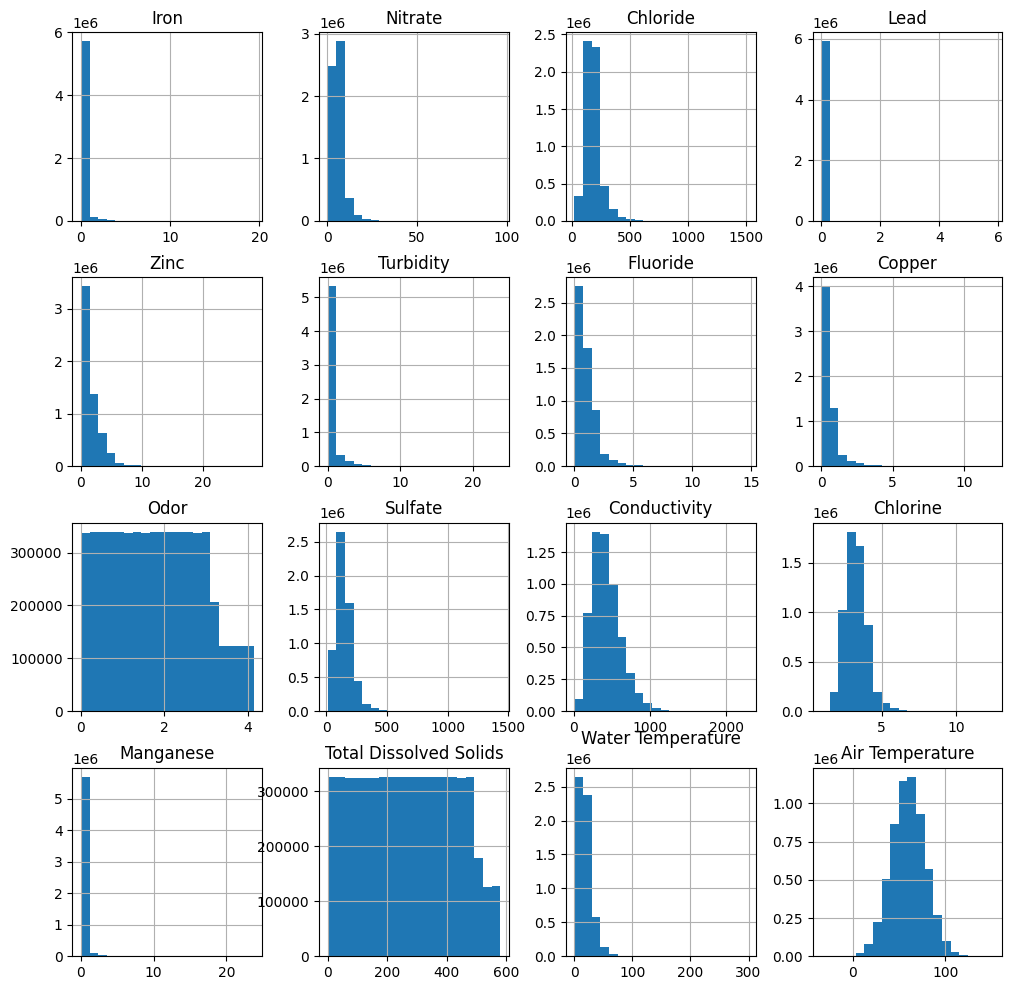

In [10]:
import matplotlib.pyplot as plt
numerical_data[numerical_data.columns[1:-2]].hist(figsize=(12,12),bins=20)
plt.show()

In [11]:
numerical_data.nunique()

pH                        5604784
Iron                      5674876
Nitrate                   5614445
Chloride                  5549789
Lead                      5542383
Zinc                      5567922
Turbidity                 5665514
Fluoride                  5537536
Copper                    5528120
Odor                      5547049
Sulfate                   5529949
Conductivity              5560632
Chlorine                  5658153
Manganese                 5610685
Total Dissolved Solids    5709787
Water Temperature         5556716
Air Temperature           5684019
Day                            31
Time of Day                    24
dtype: int64

In [12]:
numerical_data.isnull().sum()

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Water Temperature         168233
Air Temperature            29728
Day                        99603
Time of Day               114519
dtype: int64

In [13]:
categorical_data.nunique()

Color      5
Source     8
Month     12
dtype: int64


Color



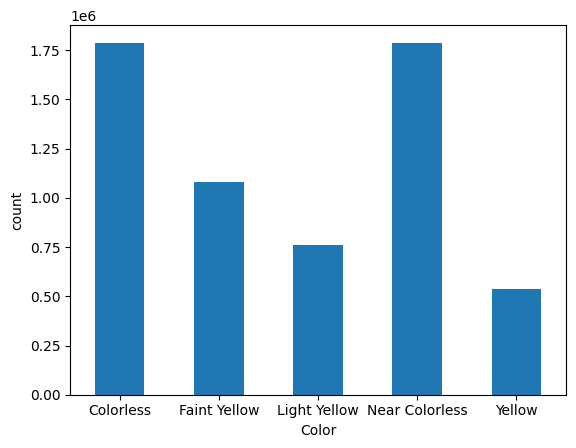


Source



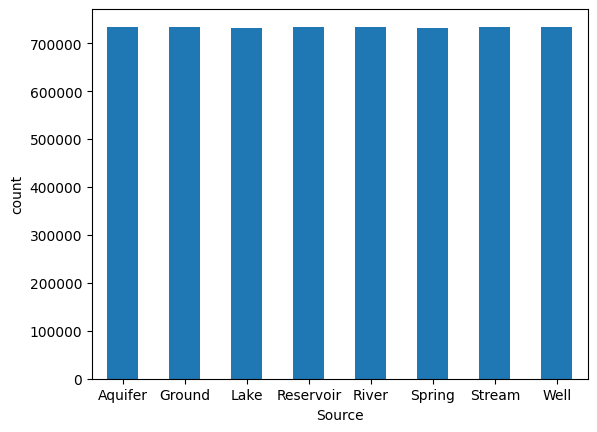


Month



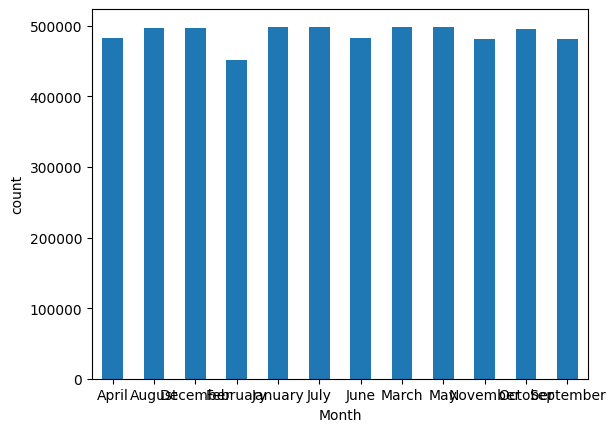

In [14]:
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

In [15]:
#check Imbalance in data

#group instances based on the classes in Target variable
class_counts=df.groupby("Target").size()

columns=['Target','Count','Percentage']
Target=[0,1]
Count=list()
Percentage=list()

#Calculate the percentage of each value of the Target variable from total
for val in range(2):
    Count.append(class_counts[val])
    Percent=(class_counts[val]/5956842)*100
    Percentage.append(Percent)

# Convert the calulated values into a dataframe
k=list(zip(Target,Count,Percentage))
k

[(0, 4151590, 69.69447905450573), (1, 1805252, 30.305520945494273)]

In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Splitting Data for Train

In [17]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [18]:
input_cols=['pH','Iron','Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day']
target_cols=['Target']

In [19]:
inputs=df[input_cols].copy()
targets=df[target_cols].copy()

In [20]:
inputs

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,432.844908,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,237.028467,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,...,339.150786,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,...,521.505506,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0
5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,0.063431,...,472.383823,3.127251,1.199405e+00,336.947289,NaN,5.863636,64.086020,January,16.0,11.0
5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,0.988735,...,718.942949,2.762962,2.824411e+00,112.458644,NaN,28.034083,18.158372,March,29.0,13.0


In [21]:
targets

,Target
0,0
1,0
2,0
3,0
4,0
...,...
5956837,1
5956838,1
5956839,1
5956840,1


# Encode Categorical Columns

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(inputs[categorical_features])
encoded_cols=list(encoder.get_feature_names_out(categorical_features))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
inputs[encoded_cols]=encoder.transform(inputs[categorical_features])

In [24]:
inputs

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Month_nan
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,0.063431,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,0.988735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Impute Missing Numerical Data

In [25]:
inputs[numerical_features].isna().sum()

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Water Temperature         168233
Air Temperature            29728
Day                        99603
Time of Day               114519
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
inputs[numerical_features]=imputer.fit_transform(inputs[numerical_features])

In [27]:
inputs

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Month_nan
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,0.284838,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,1.367155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,0.063431,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,0.988735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Scale Numeric Values

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(inputs[numerical_features])
inputs[numerical_features]=imputer.transform(inputs[numerical_features])

In [29]:
inputs[numerical_features].describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day
count,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01
std,8.794721e-01,4.783872e-01,3.227637e+00,6.741255e+01,3.243291e-02,1.525968e+00,9.220012e-01,8.115861e-01,5.864837e-01,1.053403e+00,6.764880e+01,1.873623e+02,7.292785e-01,4.717824e-01,1.558367e+02,1.120458e+01,1.805455e+01,8.720557e+00,6.855990e+00
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00
25%,6.906025e+00,1.052744e-05,4.002814e+00,1.393510e+02,3.766829e-122,4.291246e-01,3.950675e-02,3.867456e-01,1.349125e-01,9.194811e-01,9.903477e+01,2.896555e+02,2.749516e+00,2.922621e-06,1.329527e+02,1.149159e+01,4.786198e+01,8.000000e+00,6.000000e+00
50%,7.445373e+00,2.369800e-03,5.666858e+00,1.783345e+02,5.534643e-62,1.127029e+00,2.142737e-01,8.054145e-01,3.670169e-01,1.803459e+00,1.373613e+02,4.035642e+02,3.218577e+00,7.518937e-04,2.659627e+02,1.677777e+01,6.000324e+01,1.573227e+01,1.150404e+01
75%,8.002201e+00,5.756379e-02,7.625683e+00,2.165092e+02,8.838134e-27,2.187155e+00,6.197276e-01,1.318141e+00,6.851771e-01,2.627163e+00,1.797332e+02,5.284464e+02,3.699635e+00,1.941907e-02,3.984555e+02,2.354112e+01,7.214153e+01,2.300000e+01,1.700000e+01
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01


In [30]:
train_inputs=inputs[numerical_features+encoded_cols]

# Splitting of dataset into train and validation set

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_val,train_targets,val_targets=train_test_split(train_inputs,targets,test_size=0.2,random_state=42)

In [32]:
X_train

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Month_nan
1167010,7.320503,2.909107e-02,3.634899,268.967286,1.545760e-20,1.550255,0.985056,0.764758,0.743256,1.803459,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
719285,8.632885,4.132695e-01,12.053037,450.441314,6.477756e-59,0.266386,0.000069,0.766391,0.417084,3.421863,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4121500,7.456088,2.551067e-02,7.854056,161.079352,3.956027e-165,1.215892,0.026994,1.891756,0.998388,2.099650,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3426820,7.445373,1.049044e-08,5.117412,182.484342,3.085800e-148,0.664225,0.910766,0.581832,0.325113,2.225002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3989266,7.185136,5.036548e-11,3.573846,102.478250,4.181840e-14,1.190094,0.981558,1.602780,0.186066,2.141750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570006,7.813854,1.201236e-02,11.552439,89.837507,3.720137e-10,0.641460,0.044381,1.298947,0.244835,3.031367,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2234489,7.529471,4.066404e-11,5.299781,140.827831,1.848661e-30,2.949147,0.000158,0.423835,0.572476,1.803459,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4926484,8.187526,2.450020e-01,4.738409,196.699907,1.597088e-08,1.971338,0.296170,0.751817,0.639044,0.719272,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4304572,6.276068,5.203783e-01,6.015409,149.733844,4.498846e-101,4.587346,0.186496,3.891946,0.118470,3.761193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
train_targets

,Target
1167010,1
719285,1
4121500,0
3426820,0
3989266,0
...,...
1570006,1
2234489,0
4926484,0
4304572,1


In [34]:
X_val

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Month_nan
1128309,6.865081,2.089529e-03,6.665196,154.304661,2.532523e-08,2.100854,0.006723,1.901142,1.263176,1.040840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4038656,8.218379,1.825271e-02,7.960071,146.568255,9.387020e-08,1.566728,0.103921,1.373210,0.189954,0.721160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1694494,8.222025,2.077334e-02,7.661815,233.560403,1.685993e-45,0.347338,0.000054,1.536736,0.478412,0.964127,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5635998,7.614713,3.893992e-05,4.735283,199.783328,1.200594e-56,0.379548,0.445300,0.816121,0.321648,1.033522,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1300268,8.469935,4.599109e-06,3.459419,178.919805,1.382519e-89,0.255855,1.016629,0.514603,0.226024,0.827003,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374745,7.037135,1.161737e-03,5.959889,124.044229,5.051986e-36,0.251803,0.019974,0.179813,0.014527,2.305531,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3718562,6.428596,3.476014e-04,2.972764,254.053218,7.755931e-22,0.891238,0.507029,0.369540,0.057236,4.102546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3803902,6.555972,9.713052e-12,5.924133,106.273348,4.931801e-07,0.722839,0.315731,0.270986,0.135151,0.113447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5145086,7.648560,4.716631e-14,5.600824,156.296899,2.162707e-77,1.550255,0.035560,0.781841,0.152969,2.160212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
val_targets

,Target
1128309,1
4038656,0
1694494,0
5635998,0
1300268,0
...,...
3374745,0
3718562,0
3803902,0
5145086,1


In [36]:
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
train_targets.to_csv('train_targets.csv', index=False)
val_targets.to_csv('val_targets.csv', index=False)